In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

# EXPLORATION GROUPED BY DATASET

In [27]:
data = pd.read_csv('../experiments/P10_ae_kuhar_p25/data.csv')
print(data['score'].max())
print(data['score'].iloc[data['score'].idxmax()])


0.6546948356807513
0.6546948356807513


In [54]:
def fixed_dataset(
        datasets=['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist'],
        models=['ae', 'tae', 'convae', 'convtae', 'umap'],
        markers = ['d', 's', 'p', 'h', 'o'],
        percentages=[25, 50, 75, 100, 200],
        colors = ['blue', 'orange', 'lightgreen', 'darkgreen', 'purple'],
        y_lim = [0, 1]
        ):
    """
    Plots the best accuracy per percentage for each model and dataset.
    """
    for dataset in datasets:
        # Get the "no reducer" score
        with open(f'../execute_once_experiments/_previous/TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
            no_reducer_score = yaml.load(f, Loader=yaml.FullLoader)
            no_reducer_score = no_reducer_score['score']
        # Subplots for each dataset
        fig, axs = plt.subplots(1, 3, figsize=(18, 8))
        fig.tight_layout(rect=[0, 0.03, 1, 0.95])
        # fig.layout.update({"plot_bgcolor": "rgba(0, 0, 0, 0)","paper_bgcolor": "rgba(0, 0, 0, 0)",})
        plt.rcParams.update({'font.size': 22})
        plt.suptitle(f'Summary of {dataset}')
        axs[0].set_title(f'Best accuracy over %')
        axs[0].set_ylabel(f'Best accuracy')
        axs[0].set_xlabel('% of original dimensionality')
        axs[0].grid()
        axs[0].set_ylim(y_lim)
        axs[0].set_xlim([-0.5, len(percentages)-0.5])
        axs[0].set_facecolor('#e6f5c9')
        axs[1].set_title(f'Ratio over %')
        axs[1].set_ylabel(f'Ratio = best acc / no reducer acc')
        axs[1].set_xlabel('% of original dimensionality')
        axs[1].grid()
        axs[2].set_xlabel('% of original dimensionality')
        axs[2].set_ylabel('Latent dimensionality')
        axs[2].set_title(f'Latent dimensionality per %')
        axs[2].grid()
        
        axs[1].set_xlim([-0.5, len(percentages)-0.5])
        axs[1].set_ylim([0, 1.5])
        axs[1].set_facecolor('#e6f5c9')
        axs[0].plot([0, len(percentages)], [no_reducer_score, no_reducer_score], color='red', linewidth=2, label='No reducer')
        axs[1].plot([0, len(percentages)], [1, 1], color='red', linewidth=2, label='No reducer')
        for i, model in enumerate(models):
            percentage_values = []
            ratios = []
            latent_dims = []
            for percentage in percentages:
                experiment_name = f'P10_{model}_{dataset}_p{percentage}'
                if model == 'umap':
                    experiment_name = experiment_name[4:]
                try:
                    data = pd.read_csv(f'../experiments/{experiment_name}/data.csv')
                    data_max_value = data['score'].max()
                    if 'config/latent_dim' in data.columns:
                        latent_dim = data['config/latent_dim'].iloc[data['score'].idxmax()]
                    elif 'config/umap_ncomp' in data.columns:
                        latent_dim = data['config/umap_ncomp'].iloc[data['score'].idxmax()]
                    # print(f'{experiment_name} latent_dim: {latent_dim}')
                except:
                    data_max_value = 0
                    latent_dim = 0
                percentage_values.append(data_max_value)
                ratios.append(data_max_value/no_reducer_score)
                latent_dims.append(latent_dim)
            ticks = range(len(percentages))
            ticks_labels = [str(p) for p in percentages]
            axs[0].plot(ticks, percentage_values, markers[i], color=colors[i], markersize=7, label=model)
            axs[0].plot(ticks, percentage_values, color=colors[i], linewidth=2)
            axs[0].set_xticks(ticks, ticks_labels)
            axs[1].plot(ticks, ratios, markers[i], color=colors[i], markersize=7, label=model)
            axs[1].plot(ticks, ratios, color=colors[i], linewidth=2)
            axs[1].set_xticks(ticks, ticks_labels)
            axs[2].plot(ticks, latent_dims, markers[i], color=colors[i], markersize=7, label=model)
            axs[2].plot(ticks, latent_dims, color=colors[i], linewidth=2)
            axs[2].set_xticks(ticks, ticks_labels)
            axs[2].set_yscale('log')
            axs[2].set_ylim([1, 1000])
        axs[0].legend(loc='lower center')
        axs[1].legend(loc='lower center')
        # axs[0].set_ticks(percentages)
        
        # plt.legend()
        # plt.show()
        plt.savefig(f'summary-{dataset}.png', transparent=True)

## ALL DATASETS

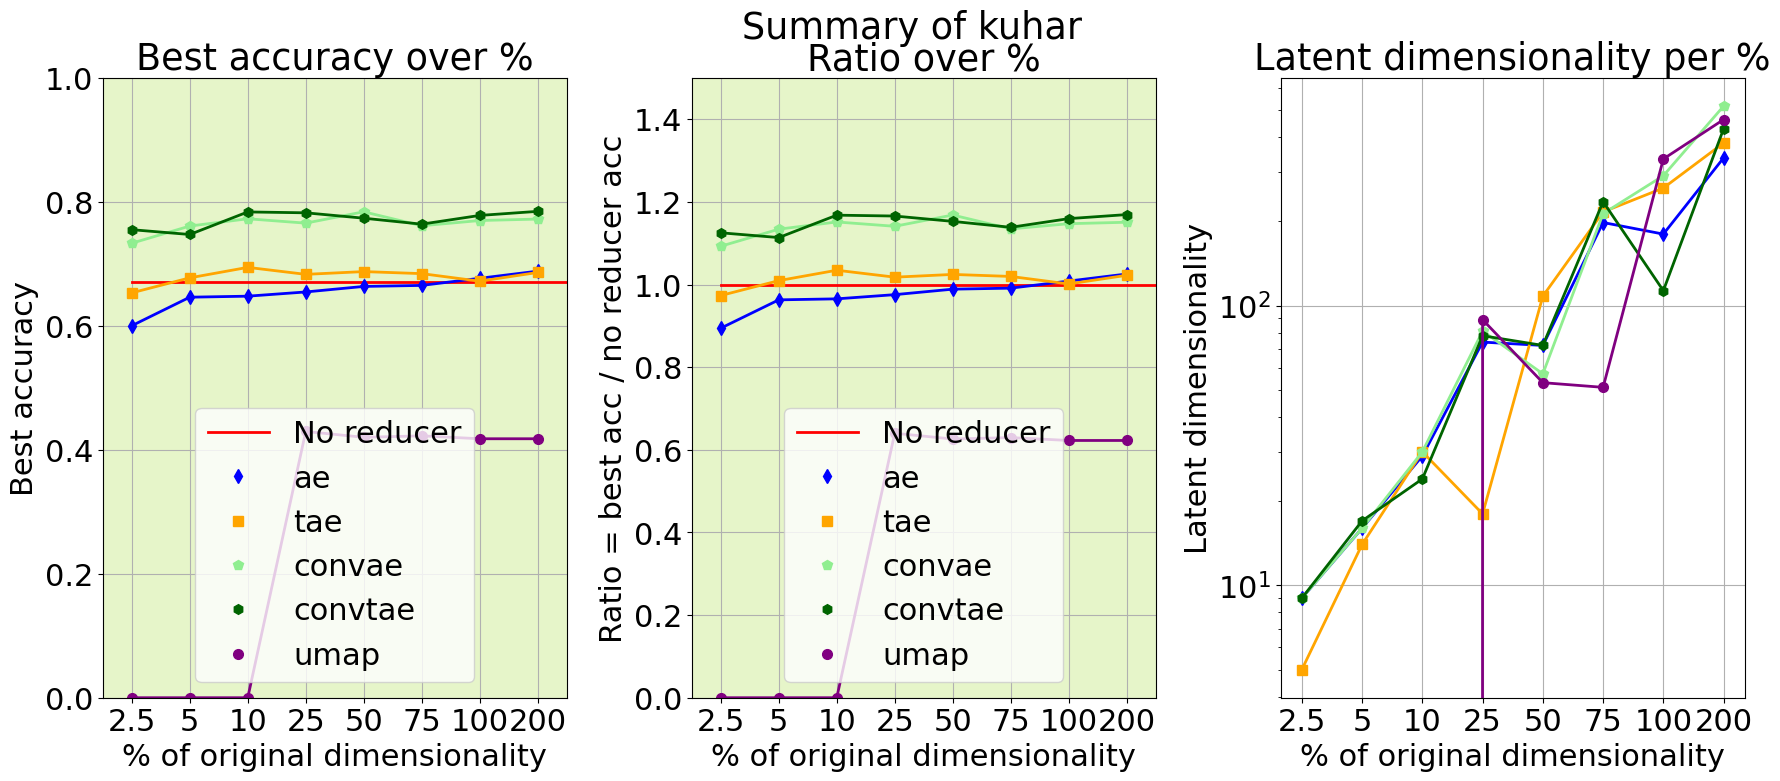

In [55]:
fixed_dataset(datasets=['kuhar'], percentages=[2.5, 5, 10, 25, 50, 75, 100, 200])

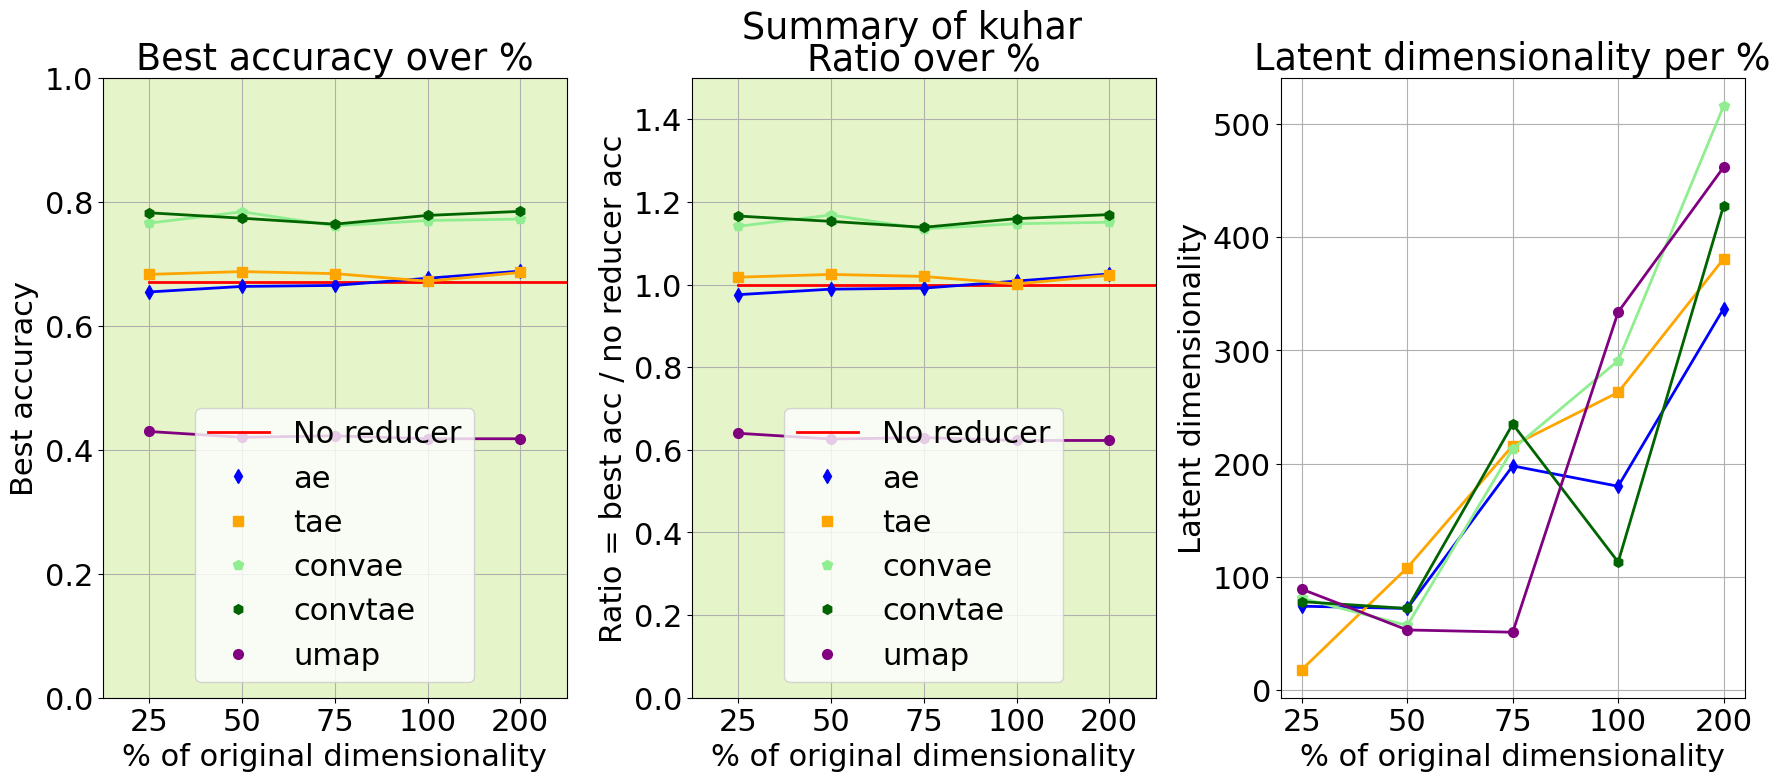

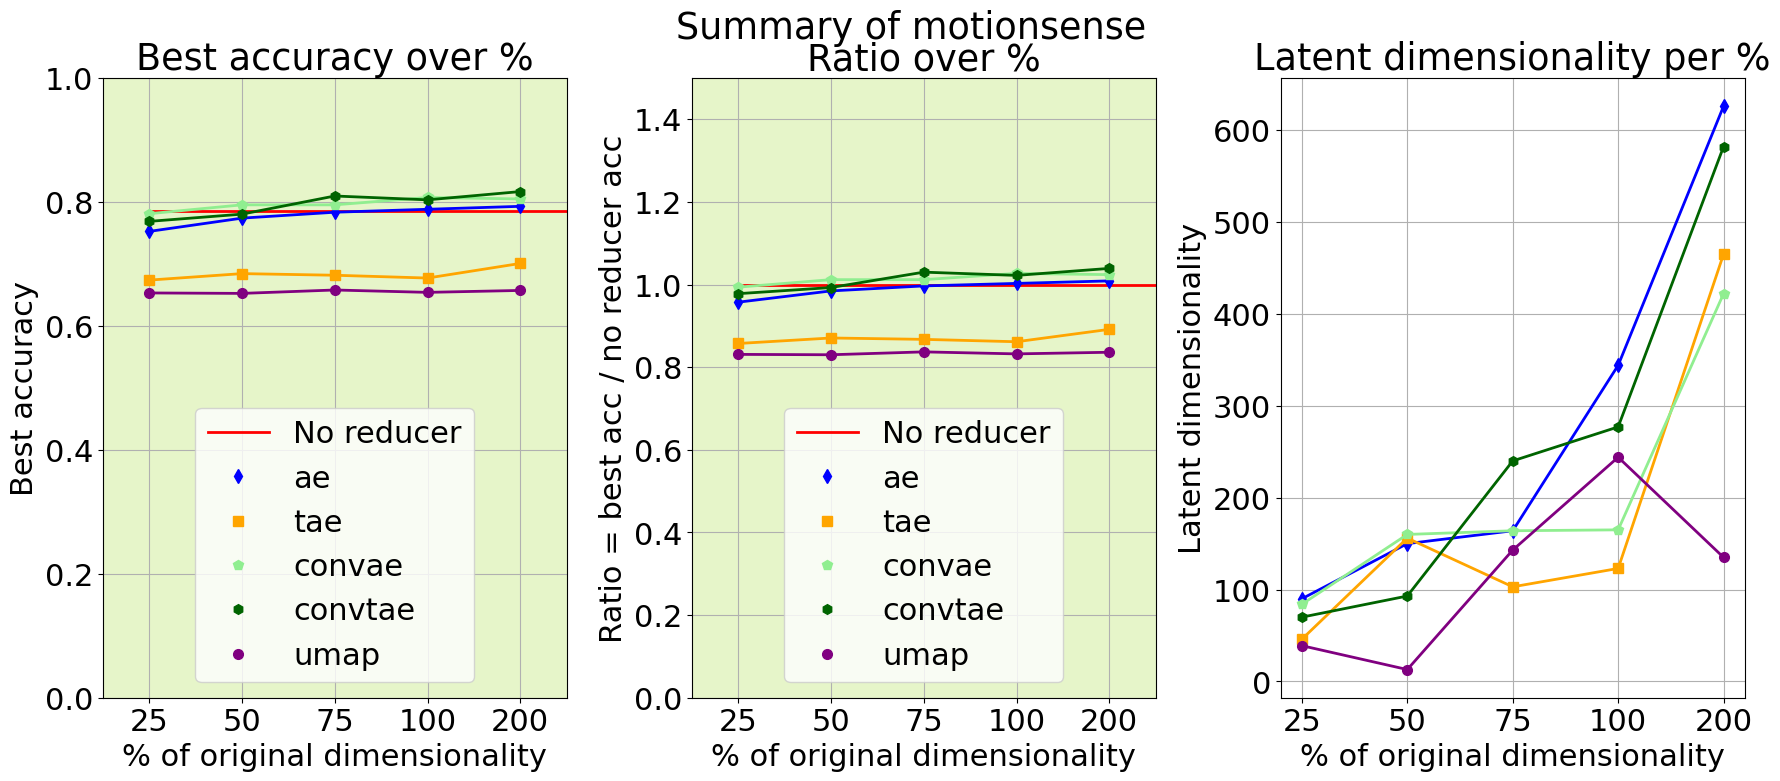

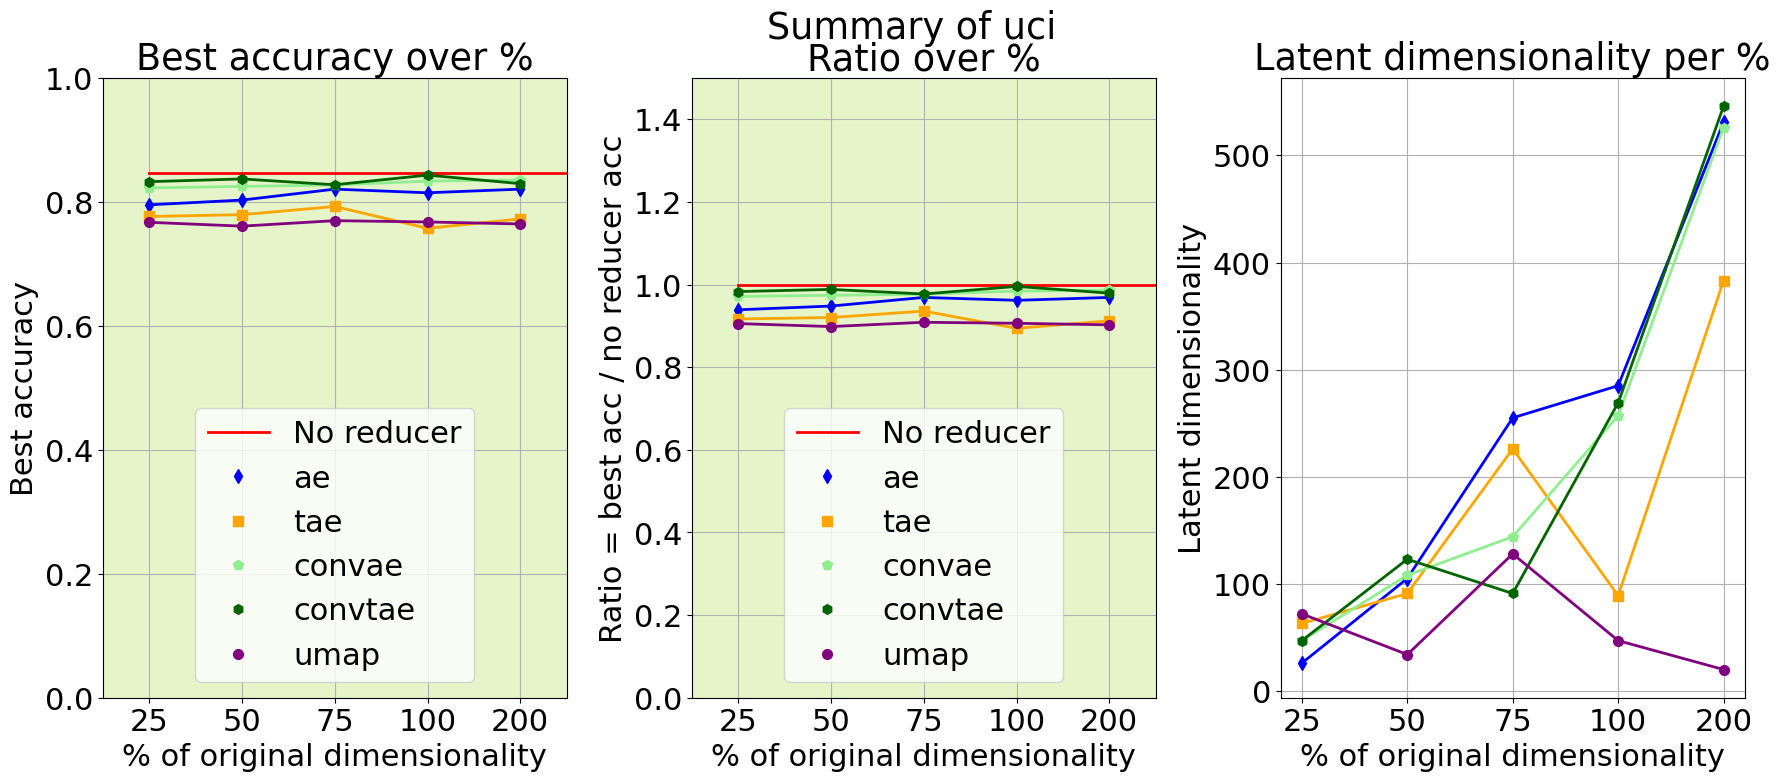

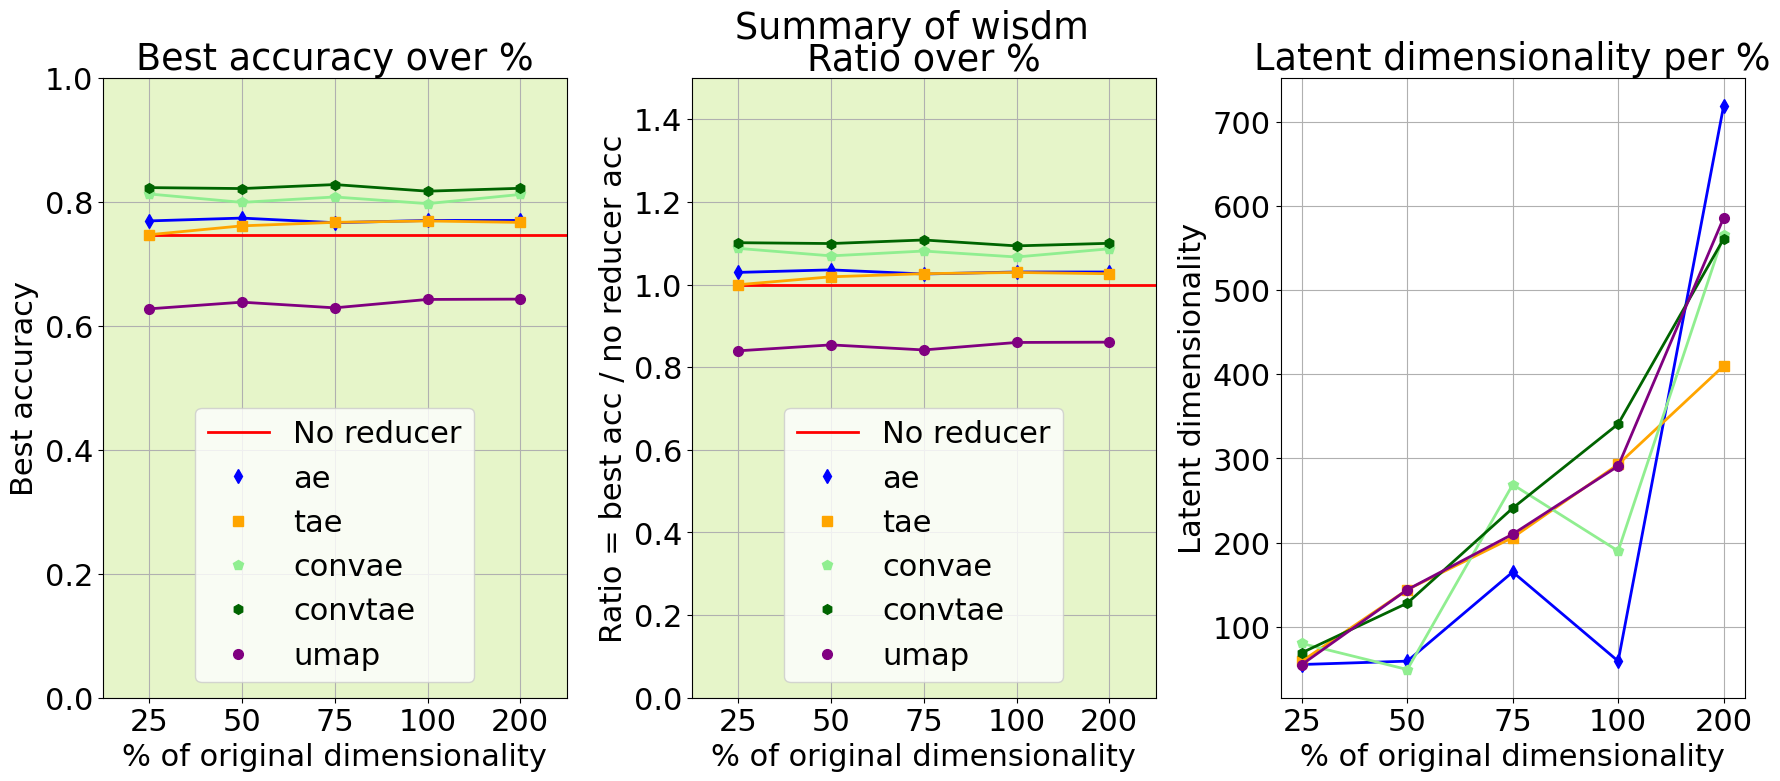

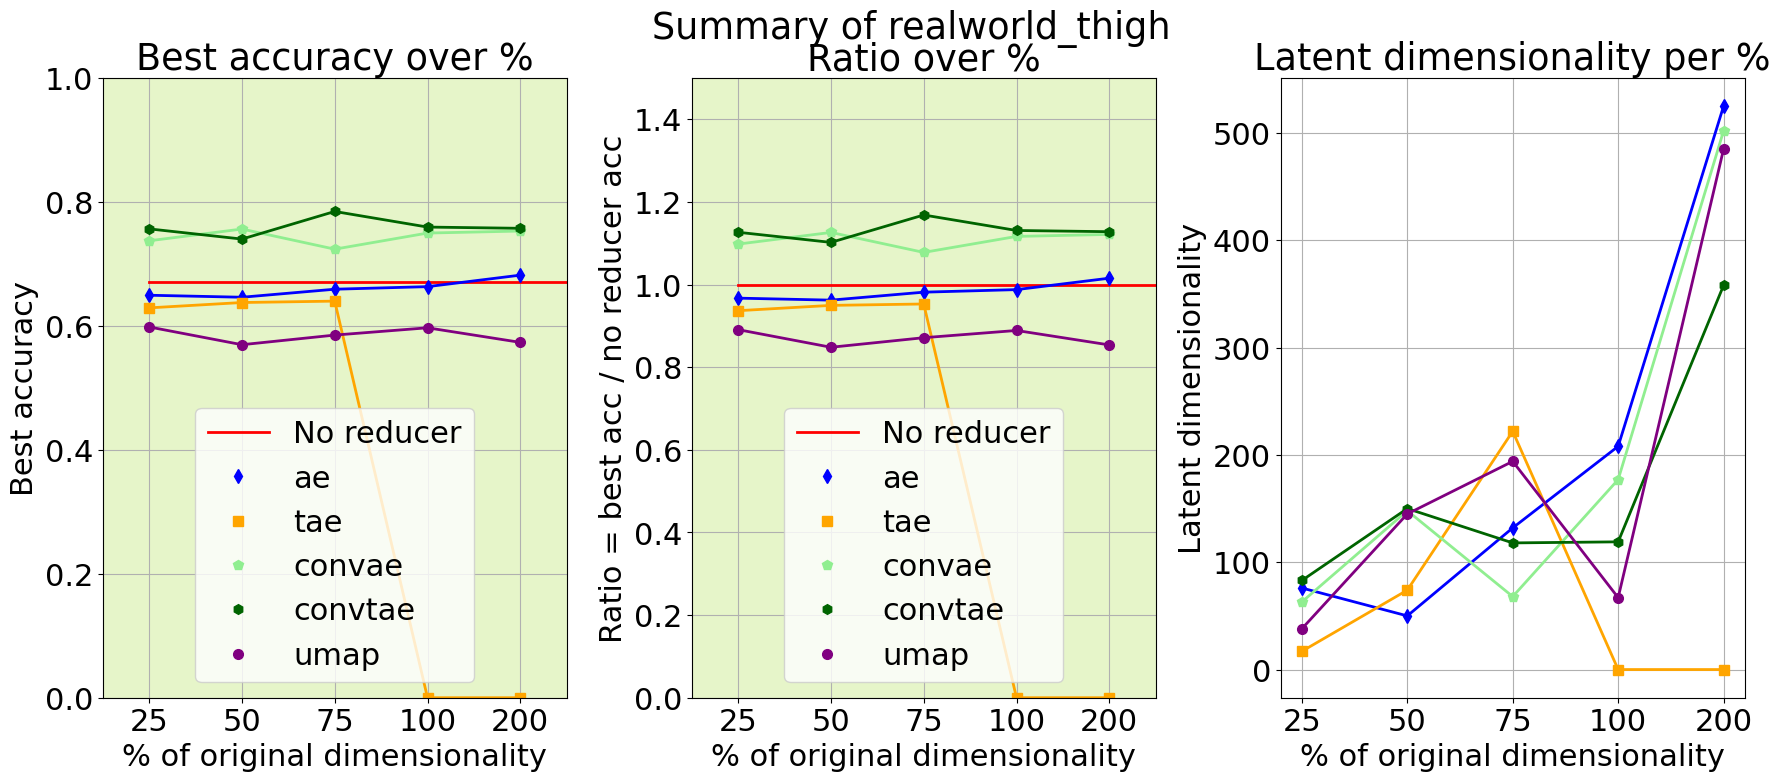

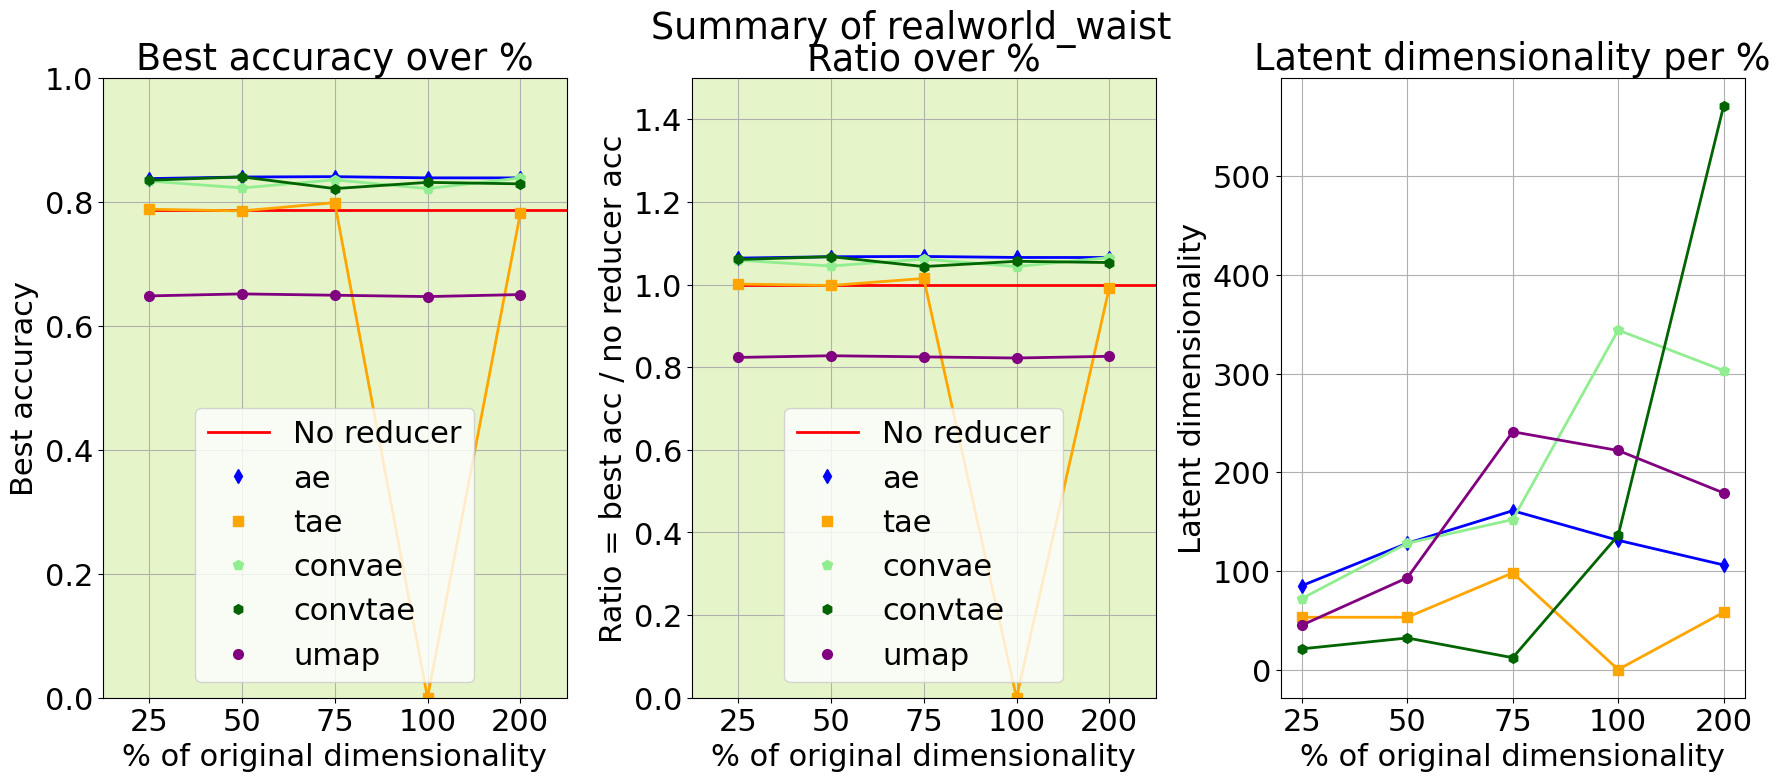

In [51]:
fixed_dataset(datasets=['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist'])